## Buscamos los Post de respuestas de maximo valor (Score) teniendo en cuenta solo las respuestas que PostQ filtrados por AceptedAnwerId > 0 
> se realiza esta busqueda porque se cree que hay una correlación lineal directa entre PostA.Score y PostQ.ViewCount

In [32]:
#importa pandas para usarlo como pd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors


In [3]:
#recupera el archivo PostQ filtrado, esto es todos los post tienen AnswerId = true
postQ = pd.read_csv('PostQ_Filtrado.csv')

In [4]:
postQ.head()

,Unnamed: 0,_c0,Id,PostTypeId,AcceptedAnswerId,CreationDate,Tags,AnswerCount
0,0,0,1,1,2,2015-10-29T15:56:52.933,<.net><asp.net-web-api><asp.net>,1
1,1,1,3,1,9,2015-10-29T23:54:31.947,<delphi>,3
2,2,2,5,1,208,2015-10-30T01:15:27.267,<c++><string>,7
3,3,3,6,1,654,2015-10-30T01:36:21.210,<c++><casting>,2
4,4,4,8,1,442,2015-10-30T10:26:44.223,<google-maps><angularjs><jasmine><karma-jasmine>,1


In [5]:
#recupera el archivo PostA . Este registro se filtra haciendo join con PostQ filtrado.
postA = pd.read_csv('PostA.csv')

In [6]:
postA.head()

,Unnamed: 0,Id,PostTypeId,ParentId,CreationDate,Score,Body
0,0,2,2,1,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...
1,1,4,2,3,2015-10-30T00:45:47.640,5,"<p><code>.AsString</code> devuelve el mismo ""<..."
2,2,7,2,5,2015-10-30T05:30:50.993,24,"<p>Lo de elegancia es algo difícil de decir, e..."
3,3,9,2,3,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...
4,4,11,2,10,2015-10-30T14:43:43.737,24,<p>En el primer caso:</p>\n\n<pre><code>nombre...


In [7]:
postAsinUnnamed = postA.drop('Unnamed: 0',axis = 1)

In [8]:
postAsinUnnamed = postAsinUnnamed.drop('PostTypeId',axis = 1)

In [9]:
postAsinUnnamed.head()

,Id,ParentId,CreationDate,Score,Body
0,2,1,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...
1,4,3,2015-10-30T00:45:47.640,5,"<p><code>.AsString</code> devuelve el mismo ""<..."
2,7,5,2015-10-30T05:30:50.993,24,"<p>Lo de elegancia es algo difícil de decir, e..."
3,9,3,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...
4,11,10,2015-10-30T14:43:43.737,24,<p>En el primer caso:</p>\n\n<pre><code>nombre...


In [10]:
paOrdenadoXParentIdYScore = postAsinUnnamed.sort_values(['ParentId','Score'], ascending=True)

In [11]:
paOrdenadoXParentIdYScore.head(159308)

,Id,ParentId,CreationDate,Score,Body
0,2,1,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...
610,1380,3,2015-12-18T19:56:28.657,1,<p>Acerca del siguiente fragmento de la pregun...
1,4,3,2015-10-30T00:45:47.640,5,"<p><code>.AsString</code> devuelve el mismo ""<..."
3,9,3,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...
138844,369747,5,2020-06-30T02:23:26.197,1,<p>Una forma de separar un cadena de caractere...
...,...,...,...,...,...
159303,431623,431599,2021-02-28T00:26:41.250,1,<p>Por el mensaje puedo entender que el navCon...
159301,431619,431605,2021-02-28T00:00:23.827,0,<p>Tener dos graphs es tecnicamente lo mismo q...
159299,431616,431609,2021-02-27T23:39:05.667,0,<p>Puedes usar el método replaceAll de javascr...
159297,431612,431609,2021-02-27T23:32:07.947,1,"<p>Puedes usar <a href=""https://www.php.net/ma..."


In [12]:
# Se obtiene el Dataframe de respuesta con máximo Score para cada pregunta de PostQ
# una vez ordenado el data frame se obtiene el ultimo elemento
paMax=pd.DataFrame()
paMax = paOrdenadoXParentIdYScore.groupby(['ParentId'], sort=False).last()

In [13]:
paMax.head(111622)

,Id,CreationDate,Score,Body
ParentId,,,,
1,2,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...
3,9,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...
5,7,2015-10-30T05:30:50.993,24,"<p>Lo de elegancia es algo difícil de decir, e..."
6,654,2015-12-07T23:03:42.037,14,<p><strong><code>static_cast</code></strong></...
8,442,2015-12-04T21:36:39.560,4,<p>Los proveedores de AngularJs de inyectan de...
...,...,...,...,...
431584,431586,2021-02-27T20:20:02.067,-1,<p>Una dependencia puede ser: obligatoria o di...
431599,431623,2021-02-28T00:26:41.250,1,<p>Por el mensaje puedo entender que el navCon...
431605,431619,2021-02-28T00:00:23.827,0,<p>Tener dos graphs es tecnicamente lo mismo q...


In [14]:
paMax.to_csv('paOrdenadoxPIdYScore.csv')

In [15]:
paMaxFiltrado=pd.DataFrame()

In [16]:
# Obtener todas las respuestas filtradas según la muestra PostQ. Esto deberia estar en pasos de filtrado.
postQId = pd.DataFrame()
postQId['ParentId'] = postQ['Id']
paMaxFiltrado = pd.merge(postQId, paMax, on="ParentId", how="inner")

In [17]:
paMaxFiltrado.head(61586)

,ParentId,Id,CreationDate,Score,Body
0,1,2,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...
1,3,9,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...
2,5,7,2015-10-30T05:30:50.993,24,"<p>Lo de elegancia es algo difícil de decir, e..."
3,6,654,2015-12-07T23:03:42.037,14,<p><strong><code>static_cast</code></strong></...
4,8,442,2015-12-04T21:36:39.560,4,<p>Los proveedores de AngularJs de inyectan de...
...,...,...,...,...,...
61581,431507,431597,2021-02-27T21:57:19.330,1,"<p>Trabajando en el problema que tienes , enco..."
61582,431511,431518,2021-02-27T12:52:28.503,0,<p>La causa de no actualizar ningún registro e...
61583,431535,431590,2021-02-27T20:41:24.767,0,<p>he estado viendo tu código y la librería qu...
61584,431537,431565,2021-02-27T18:24:47.737,1,<p>Una forma de evitar la advertencia seria us...


In [18]:
# Obtener todas las respuestas filtradas según la muestra PostQ. Esto deberia estar en pasos de filtrado.
postQIdAA = pd.DataFrame()
postQIdAA['ParentId'] = postQ['Id']
postQIdAA['AcceptedAnswerId'] = postQ['AcceptedAnswerId']
paMaxAA = pd.merge(postQIdAA, paMaxFiltrado, on=["ParentId"], how="outer")

In [19]:
paMaxAA['hipotesis'] = paMaxAA['AcceptedAnswerId']==paMaxAA['Id']

In [20]:
paMaxAA.head(61586)

,ParentId,AcceptedAnswerId,Id,CreationDate,Score,Body,hipotesis
0,1,2,2,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...,True
1,3,9,9,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...,True
2,5,208,7,2015-10-30T05:30:50.993,24,"<p>Lo de elegancia es algo difícil de decir, e...",False
3,6,654,654,2015-12-07T23:03:42.037,14,<p><strong><code>static_cast</code></strong></...,True
4,8,442,442,2015-12-04T21:36:39.560,4,<p>Los proveedores de AngularJs de inyectan de...,True
...,...,...,...,...,...,...,...
61581,431507,431597,431597,2021-02-27T21:57:19.330,1,"<p>Trabajando en el problema que tienes , enco...",True
61582,431511,431518,431518,2021-02-27T12:52:28.503,0,<p>La causa de no actualizar ningún registro e...,True
61583,431535,431590,431590,2021-02-27T20:41:24.767,0,<p>he estado viendo tu código y la librería qu...,True
61584,431537,431565,431565,2021-02-27T18:24:47.737,1,<p>Una forma de evitar la advertencia seria us...,True


In [30]:
#paMaxAA.count()
paMaxAA[paMaxAA.hipotesis == True].count()

ParentId            55453
AcceptedAnswerId    55453
Id                  55453
CreationDate        55453
Score               55453
Body                55453
hipotesis           55453
dtype: int64

In [ ]:
paMaxAA.to_csv('paMaxAAHipotesis.csv')

In [33]:
postMax = pd.read_csv('paMaxAAHipotesis.csv')
postMax.describe()

,Unnamed: 0,ParentId,AcceptedAnswerId,Id,Score
count,61586.000000,61586.000000,61586.000000,61586.000000,61586.000000
mean,30792.500000,205831.010814,206750.942519,207141.865700,1.791657
std,17778.491176,124451.009082,124407.823722,124430.962929,2.998248
min,0.000000,1.000000,2.000000,2.000000,-5.000000
25%,15396.250000,97656.500000,98608.250000,98952.000000,1.000000
50%,30792.500000,201711.500000,202885.000000,203430.000000,1.000000
75%,46188.750000,312656.500000,313658.500000,314136.750000,2.000000
max,61585.000000,431599.000000,431623.000000,431623.000000,195.000000


In [54]:
# Exploración de operaciones Numpy para comparar AcceptedAnswerId con Id.
import numpy as np

In [55]:
postMax = pd.read_csv('paMaxAAHipotesis.csv')

In [56]:
a = np.array(postMax.AcceptedAnswerId)
b = np.array(postMax.Id)

In [57]:
postMax["hipotesisNP"] = a == b

In [58]:
postMax.head()

,Unnamed: 0,ParentId,AcceptedAnswerId,Id,CreationDate,Score,Body,hipotesis,hipotesisNP
0,0,1,2,2,2015-10-29T19:14:23.673,26,<p>He encontrado la solución.</p>\n\n<p>Result...,True,True
1,1,3,9,9,2015-10-30T13:59:47.113,11,<p>Antes de responder directamente la respuest...,True,True
2,2,5,208,7,2015-10-30T05:30:50.993,24,"<p>Lo de elegancia es algo difícil de decir, e...",False,False
3,3,6,654,654,2015-12-07T23:03:42.037,14,<p><strong><code>static_cast</code></strong></...,True,True
4,4,8,442,442,2015-12-04T21:36:39.560,4,<p>Los proveedores de AngularJs de inyectan de...,True,True


In [ ]:
hipotesisNPF = postMax[postMax.hipotesisNP == False].hipotesisNP.count()

In [60]:
hipotesisNPT = postMax[postMax.hipotesisNP == True].hipotesisNP.count()

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [62]:
valores = [hipotesisNPF, hipotesisNPT]

In [63]:
t = ['hipótesis Falsa', 'hipótesis Verdadera']

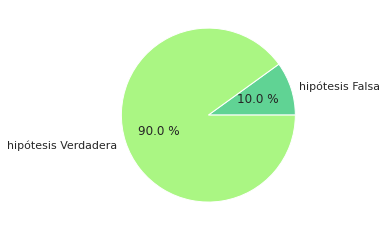

In [64]:
colores = ["#60D394","#AAF683"]
plt.pie(valores,labels= t, autopct="%0.1f %%", colors= colores)
plt.show()

In [68]:
import seaborn as sns

In [72]:
valorFalso =hipotesisNPF*100/(hipotesisNPF + hipotesisNPT)

In [74]:
valorVerdadero = hipotesisNPT*100/(hipotesisNPF + hipotesisNPT)

In [ ]:
prueba = pd.DataFrame()
prueba["Hipotesis"]= [False, True]
prueba["Cantidad"]= [valorFalso, valorVerdadero]
print(prueba)

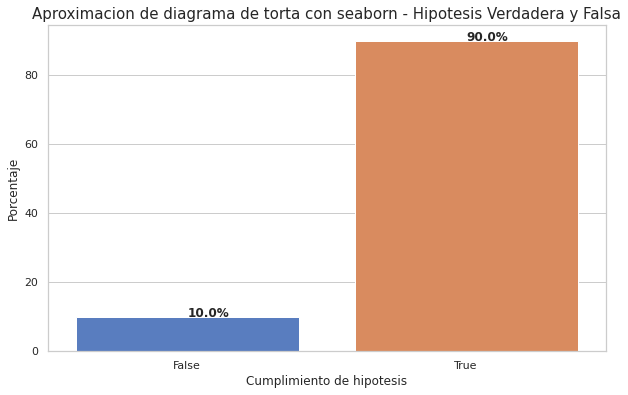

In [77]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="Hipotesis", y="Cantidad", data=prueba, ci=None, palette="muted",orient='v', )
ax.set_title("Aproximacion de diagrama de torta con seaborn - Hipotesis Verdadera y Falsa", fontsize=15)
ax.set_xlabel ("Cumplimiento de hipotesis")
ax.set_ylabel ("Porcentaje")
# calculate the percentages and annotate the sns barplot
for v in ax.patches:
    ax.text (v.get_x() + v.get_width() / 2,v.get_height(),"%.1f%%"% v.get_height(), weight='bold' )
bar.savefig("SeabornDiagramaTorta.png");

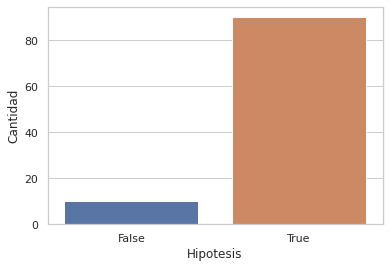

In [76]:
ax = sns.barplot(x="Hipotesis", y="Cantidad", data=prueba)